# Welcome
This notebook shall answer assignment_1a question 2.

# Table of Contents <a name="toc"></a>

* [Imports](#imports)
* [Global](#global)
* [Helper Functions](#helper_functions)
* [Question 2: Optimal Batch Size](#optimal_batch_size)
    * [Model Parameters](#model_parameters)
    * [Create the Model](#create_the_model)
    * [Run the Model](#run_the_model)
    * [Save Data Objects](#save_data_objects)
    * [Plot Model Performance](#plot_model_performance)
    * [Comparing Models](#comparing_models)
    * [Eyeballing Batch Size](#eyeballing_batch_size)
* [Conclusion](#conclusion)
    * [Try Test Set](#try_test_set)

# Imports <a name="imports"></a> 
[Back to top](#toc)

In [165]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json
import time

from tensorflow import keras
from tqdm.keras import TqdmCallback
from sklearn import preprocessing
from sklearn.model_selection import KFold, train_test_split

In [166]:
X_train = np.load('data/X_train.npy')
X_test = np.load('data/X_test.npy')
Y_train = np.load('data/Y_train.npy')
Y_test = np.load('data/Y_test.npy')
print("Data loaded")

Data loaded


# Global <a name="global"></a> 
[Back to top](#toc)

In [167]:
seed = 10
np.random.seed(seed)
tf.random.set_seed(seed)

cv_5fold = KFold(n_splits=5, random_state=seed, shuffle=False)
cv_5fold.get_n_splits(X_train)

# data objects
histories = {} 
times = {}

C:\Users\user\anaconda3\envs\cz4042_env\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


# Helper Functions <a name="helper_functions"></a> 
[Back to top](#toc)

### plot_history_object()

In [181]:
def plot_history_object(histories, model_name, history_object):    
    plt.plot(histories[model_name][history_object], label='train_'+history_object)
    plt.plot(histories[model_name]['val_'+history_object], label='val_'+history_object)
    plt.ylabel(history_object)
    plt.xlabel('No. epoch')
    plt.legend(loc="center right")
    plt.show()

### TimeHistory()

In [5]:
class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

### histories_saver()

In [6]:
# filename like 'data/histories_q1.json'
def histories_saver(histories, filename):
    histories_json = {}
    for key in histories.keys():
        histories_json[key] = histories[key].history

    with open(filename, 'w') as file:
        json.dump(histories_json, file)

    print("All histories saved")

# Question 2: Optimal Batch Size  <a name="optimal_batch_size"></a>
[Back to top](#toc)

<i>Find the optimal batch size by training the neural network and evaluating the performances for different batch sizes.

* a) Plot cross-validation accuracies against the number of epochs for different batch sizes. Limit search space to batch sizes {4,8,16,32,64}. Plot the time taken to train the network for one epoch against different batch sizes.

* b) Select the optimal batch size and state reasons for your selection.

* c) Plot the train and test accuracies against epochs for the optimal batch size.
Note: use this optimal batch size for the rest of the experiments.</i>

### Model Parameters <a name="model_parameters"></a> 
[Back to top](#toc)

In [7]:
num_neurons = 10
num_classes = 3

weight_decay_parameter = 10e-6
regularization = keras.regularizers.l2(weight_decay_parameter)

optimizer = 'sgd'
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = ['accuracy', keras.metrics.SparseCategoricalCrossentropy(from_logits=True)]

epochs = 300 # from assignment_1a q1
learning_rate = 0.01
batch_sizes = [4,8,16,32,64]

# callbacks = [
#     TqdmCallback(verbose=1), 
#     tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5),
#     time_callback
# ]

# times = time_callback.times

print("Model Parameters set")

Model Parameters set


### Create the model <a name="create_the_model"></a> 
[Back to top](#toc)

In [8]:
def create_model(num_neurons, num_classes, regularization, optimizer, loss, metrics):
    model = keras.Sequential([
        keras.layers.Dense(num_neurons, activation='relu', kernel_regularizer=regularization, bias_regularizer=regularization),
        keras.layers.Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)
    
    print("Model created")
    return model

### Run the model <a name="run_the_model"></a> 
[Back to top](#toc)

In [9]:
for batch_size in batch_sizes:    
    for index, (train_fold_index, val_fold_index) in enumerate(cv_5fold.split(X_train)):
        X_train_fold = X_train[train_fold_index]
        X_val_fold = X_train[val_fold_index]
        Y_train_fold = Y_train[train_fold_index]
        Y_val_fold = Y_train[val_fold_index]

        model = create_model(num_neurons, num_classes, regularization, optimizer, loss, metrics)

        time_callback = TimeHistory()
        callbacks = [TqdmCallback(verbose=1), time_callback]

        model_name = "batch_size_" + str(batch_size) + "_fold_" + str(index+1)
        
        print("Training ", model_name)

        histories[model_name] = model.fit(X_train_fold, Y_train_fold,
                                                                epochs=epochs,
                                                                verbose = 0,
                                                                batch_size=batch_size,
                                                                validation_data=(X_val_fold, Y_val_fold),
                                                                callbacks=callbacks)
        
        times[model_name] = time_callback.times

Model created


Training  batch_size_4_fold_1

Model created


Training  batch_size_4_fold_2

Model created


Training  batch_size_4_fold_3

Model created


Training  batch_size_4_fold_4

Model created


Training  batch_size_4_fold_5

Model created


Training  batch_size_8_fold_1

Model created


Training  batch_size_8_fold_2

Model created


Training  batch_size_8_fold_3

Model created


Training  batch_size_8_fold_4

Model created


Training  batch_size_8_fold_5

Model created


Training  batch_size_16_fold_1

Model created


Training  batch_size_16_fold_2

Model created


Training  batch_size_16_fold_3

Model created


Training  batch_size_16_fold_4

Model created


Training  batch_size_16_fold_5

Model created


Training  batch_size_32_fold_1

Model created


Training  batch_size_32_fold_2

Model created


Training  batch_size_32_fold_3

Model created


Training  batch_size_32_fold_4

Model created


Training  batch_size_32_fold_5

Model created


Training  batch_size_64_fold_1

Model created


Training  batch_size_64_fold_2

Model created


Training  batch_size_64_fold_3

Model created


Training  batch_size_64_fold_4

Model created


Training  batch_size_64_fold_5



### Save Data Objects <a name="save_data_objects"></a> 
[Back to top](#toc)

In [25]:
histories_saver(histories, "data/histories_q2.json")

All histories saved


In [27]:
np.save('data/times_q2', times)
print('All times saved')

All times saved


In [272]:
with open('data/histories_q2.json') as json_file:
    histories = json.load(json_file)
print('histories reloaded')

times = np.load('data/times_q2.npy', allow_pickle=True).item() 
print('times reloaded')

histories reloaded
times reloaded


### Plot Model Performance <a name="plot_model_performance"></a> 
[Back to top](#toc)

Plotting model performance for  batch_size_4_fold_1


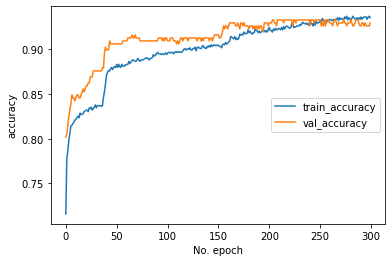

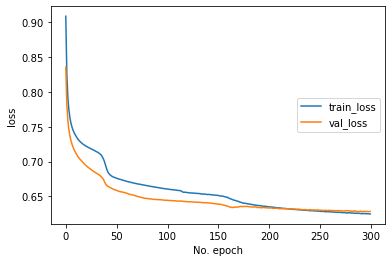

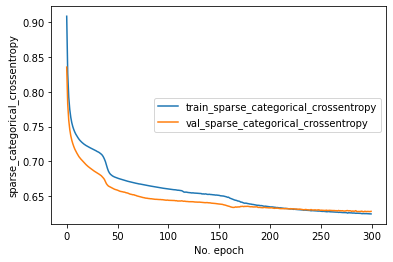

Plotting model performance for  batch_size_4_fold_2


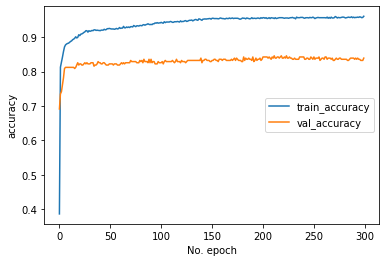

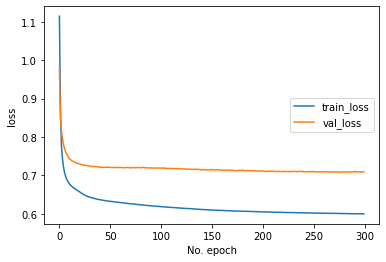

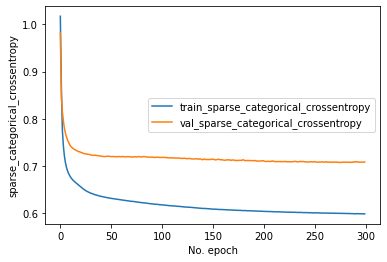

Plotting model performance for  batch_size_4_fold_3


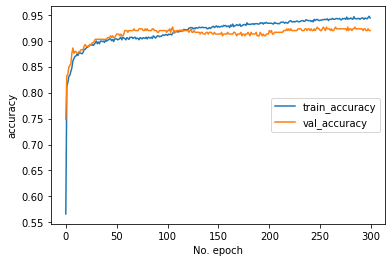

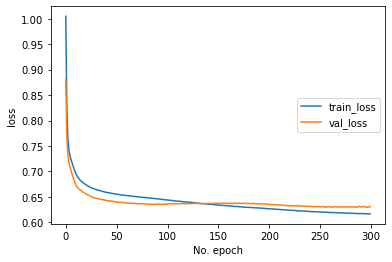

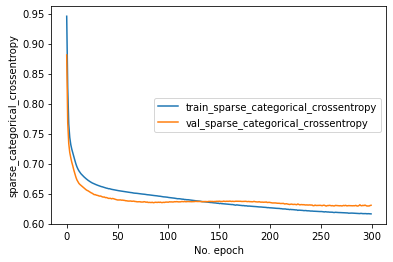

Plotting model performance for  batch_size_4_fold_4


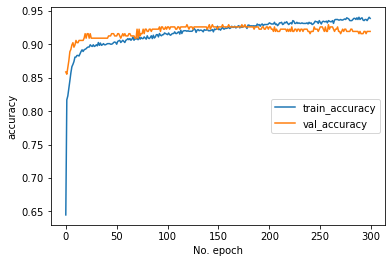

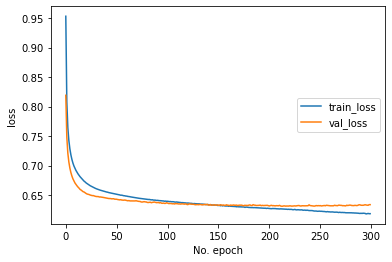

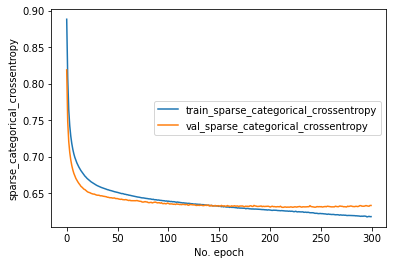

Plotting model performance for  batch_size_4_fold_5


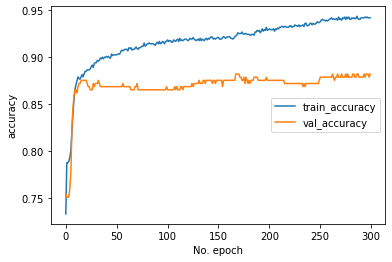

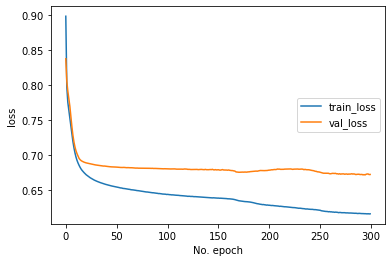

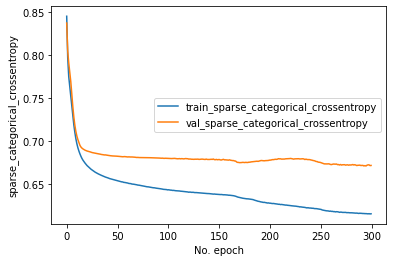

Plotting model performance for  batch_size_8_fold_1


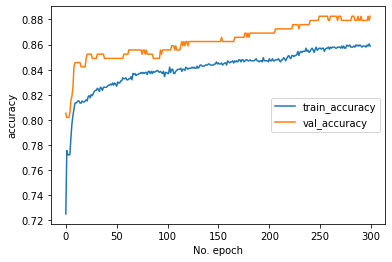

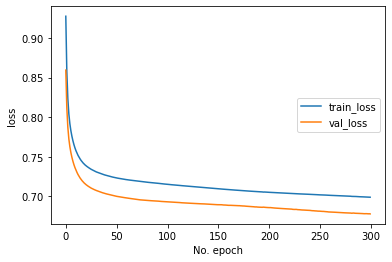

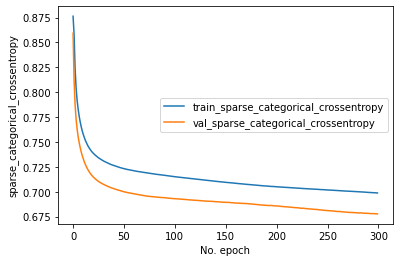

Plotting model performance for  batch_size_8_fold_2


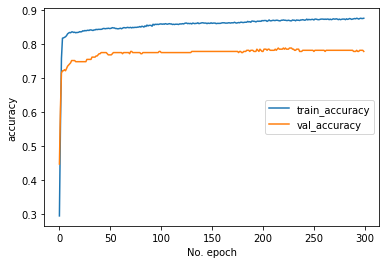

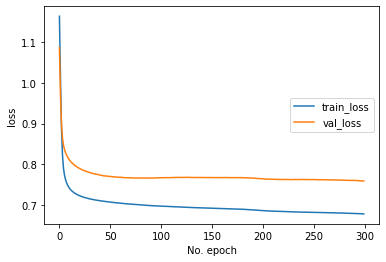

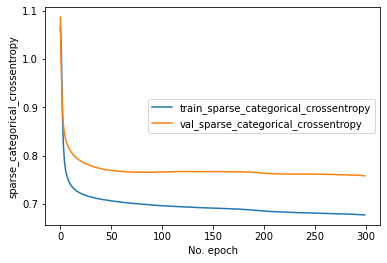

Plotting model performance for  batch_size_8_fold_3


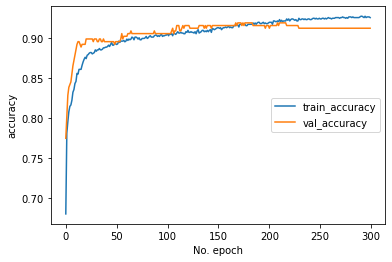

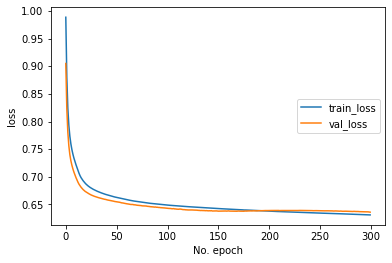

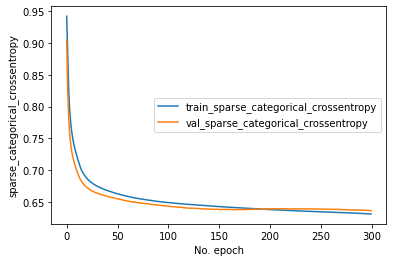

Plotting model performance for  batch_size_8_fold_4


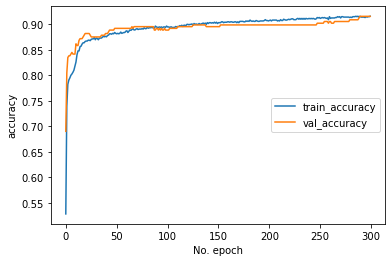

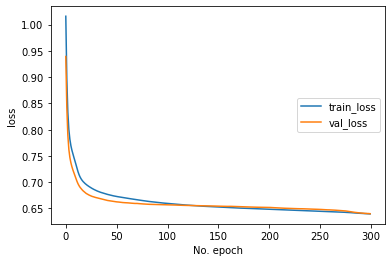

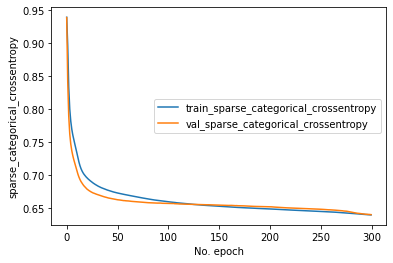

Plotting model performance for  batch_size_8_fold_5


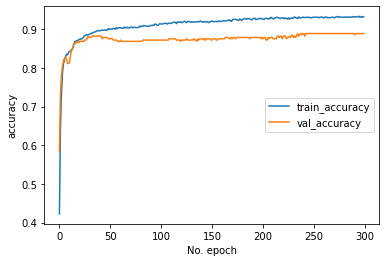

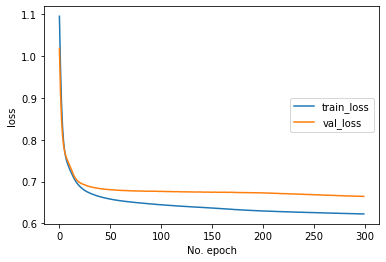

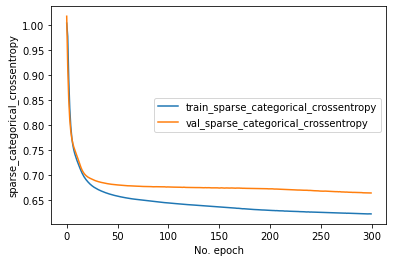

Plotting model performance for  batch_size_16_fold_1


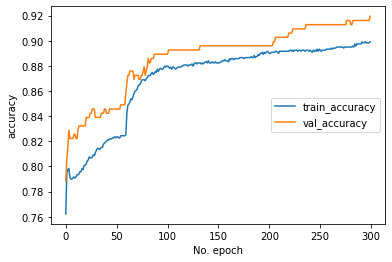

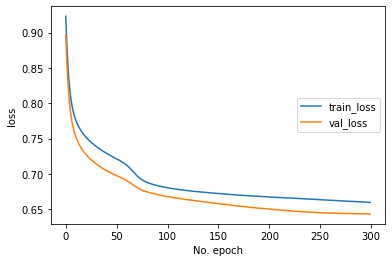

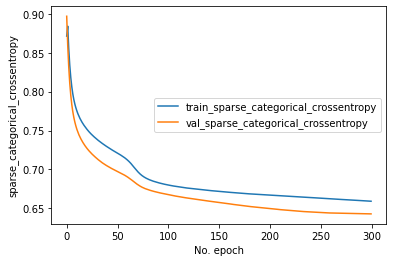

Plotting model performance for  batch_size_16_fold_2


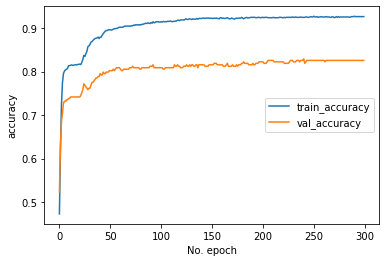

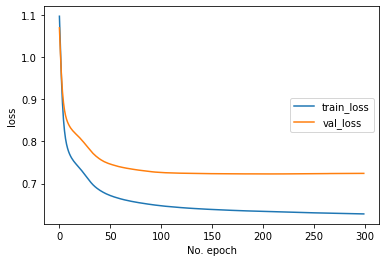

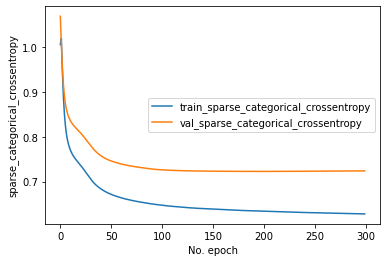

Plotting model performance for  batch_size_16_fold_3


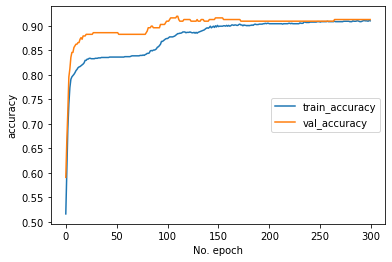

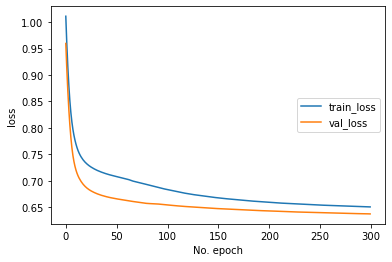

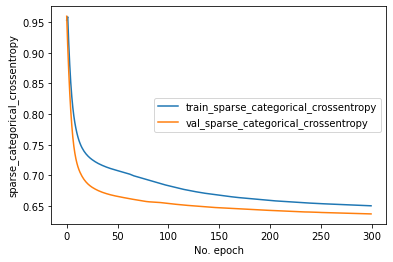

Plotting model performance for  batch_size_16_fold_4


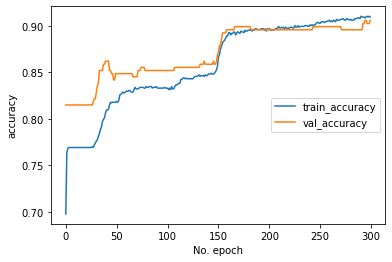

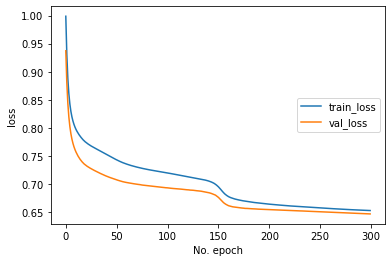

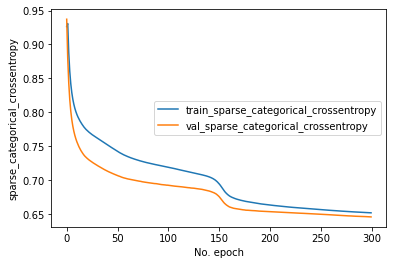

Plotting model performance for  batch_size_16_fold_5


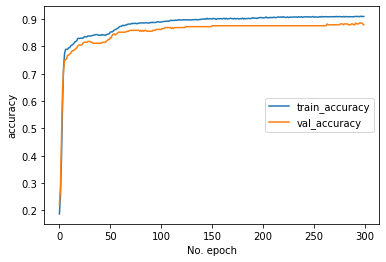

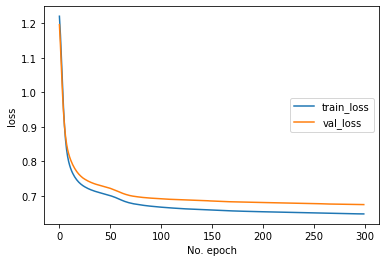

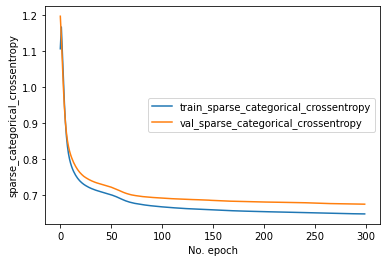

Plotting model performance for  batch_size_32_fold_1


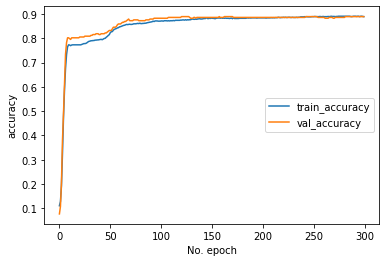

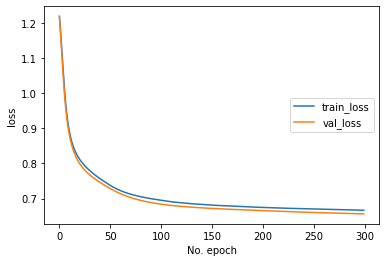

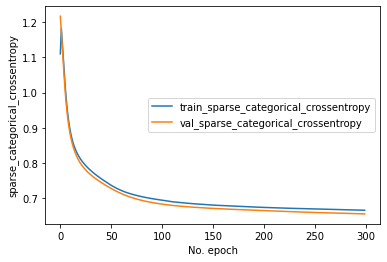

Plotting model performance for  batch_size_32_fold_2


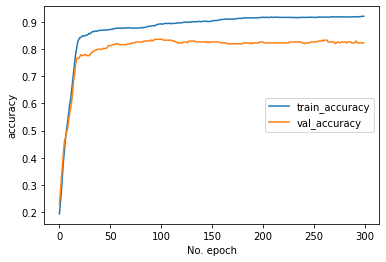

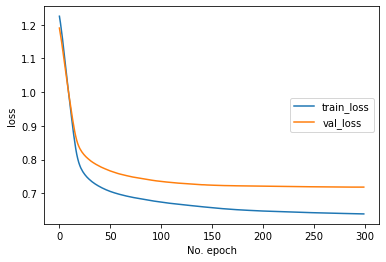

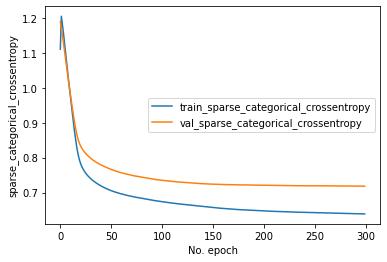

Plotting model performance for  batch_size_32_fold_3


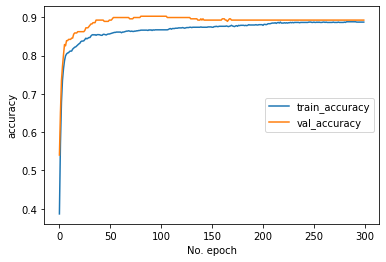

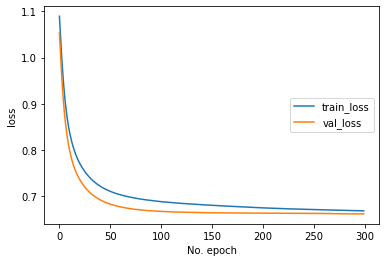

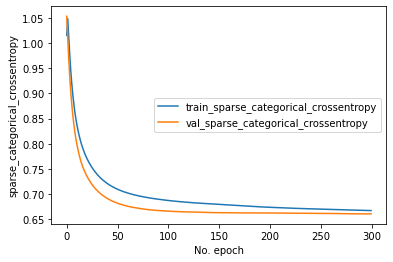

Plotting model performance for  batch_size_32_fold_4


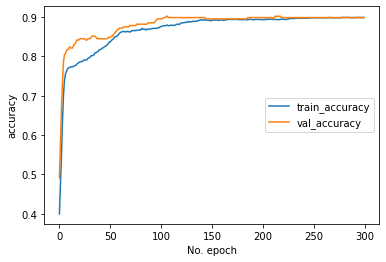

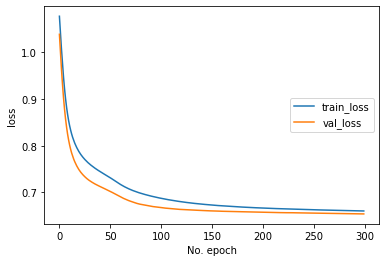

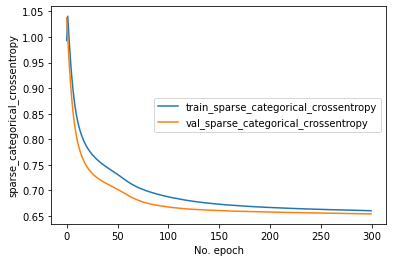

Plotting model performance for  batch_size_32_fold_5


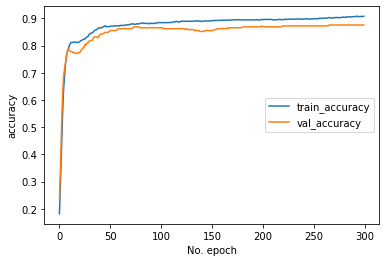

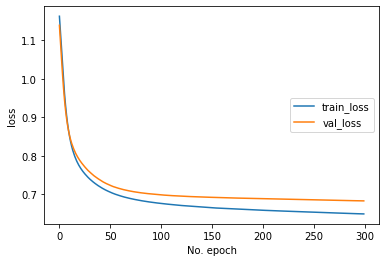

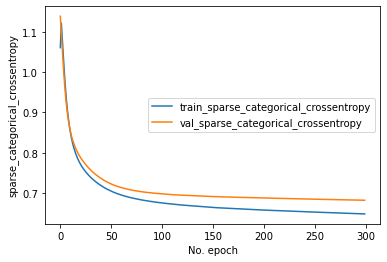

Plotting model performance for  batch_size_64_fold_1


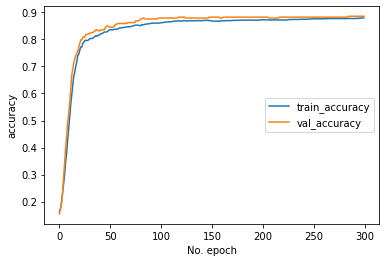

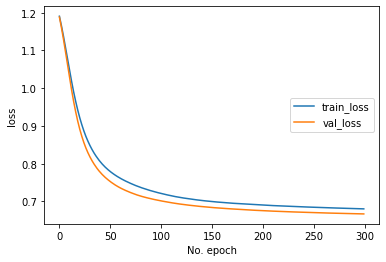

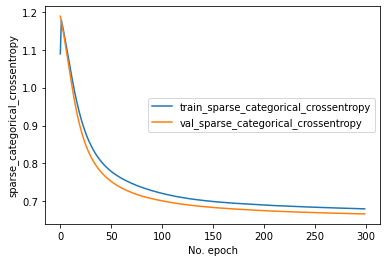

Plotting model performance for  batch_size_64_fold_2


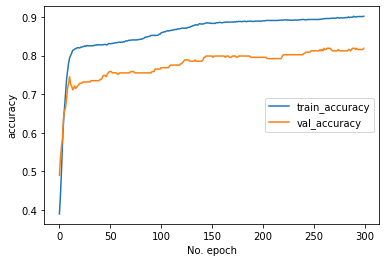

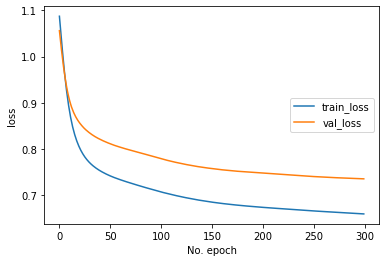

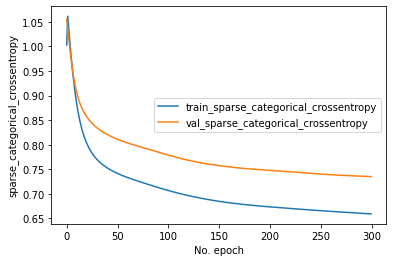

Plotting model performance for  batch_size_64_fold_3


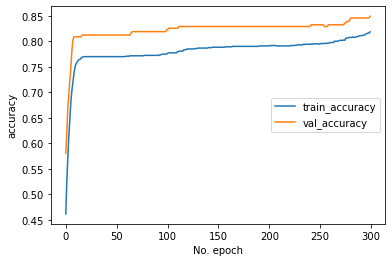

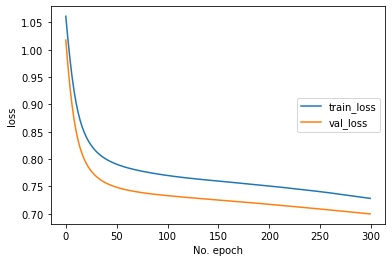

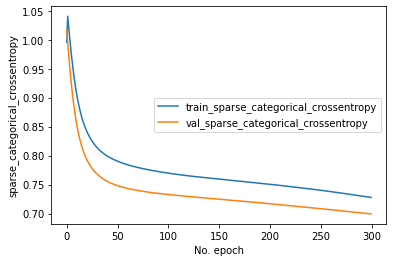

Plotting model performance for  batch_size_64_fold_4


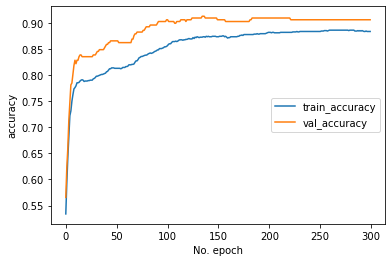

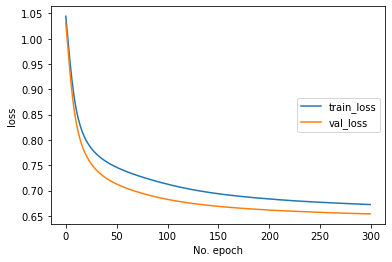

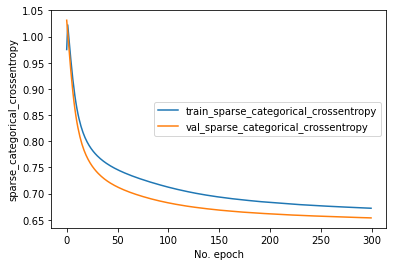

Plotting model performance for  batch_size_64_fold_5


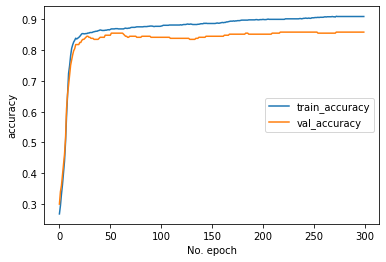

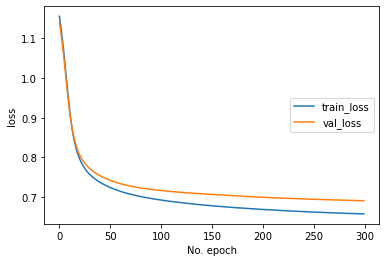

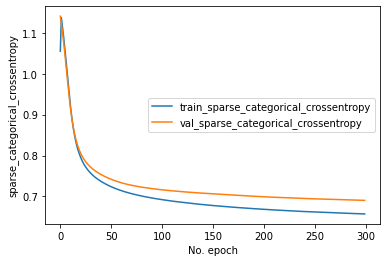

In [279]:
for model_name in histories.keys():
    print("Plotting model performance for ", model_name)
    for history_object in ['accuracy', 'loss', 'sparse_categorical_crossentropy']:
        plot_history_object(histories, model_name, history_object)

### Comparing Models <a name="comparing_models"></a> 
[Back to top](#toc)

In [414]:
ave_times = []
for batch_size in batch_sizes:
    total_time_batch = 0
    count = 0
    for index in range(5):
        batch_size_times = times['batch_size_' + str(batch_size) + '_fold_' + str(index+1)]
        total_time_batch += np.sum(batch_size_times)
        count += len(batch_size_times)
    ave_times.append(total_time_batch/count)

print("ave_times: ", ave_times)        

ave_times:  [0.22280306259791055, 0.11983078193664551, 0.07088496367136637, 0.046099234263102216, 0.03138894923528036]


Text(0.5, 1.0, 'batch_size vs ave_time (per epoch)')

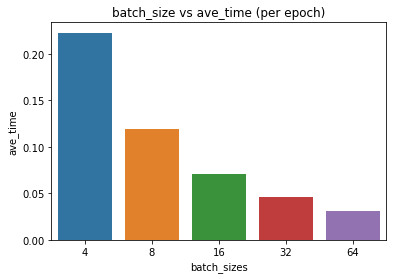

In [415]:
df_ave_times = pd.DataFrame(ave_times, columns =['ave_time']) 
df_batch_sizes = pd.DataFrame(batch_sizes, columns =['batch_sizes']) 
df_ave_times_batch_sizes = pd.concat([df_batch_sizes, df_ave_times], axis=1)

sns.barplot(data=df_ave_times_batch_sizes, x="batch_sizes", y="ave_time").set_title("batch_size vs ave_time (per epoch)")

In [416]:
ave_loss = []
ave_val_loss = []
ave_accuracy = []
ave_val_accuracy = []
ave_sparse_categorical_crossentropy = []
ave_val_sparse_categorical_crossentropy = []

for batch_size in batch_sizes:
    batch_size_loss = []
    batch_size_val_loss = []
    batch_size_accuracy = []
    batch_size_val_accuracy = []
    batch_size_sparse_categorical_crossentropy = []
    batch_size_val_sparse_categorical_crossentropy = []
    
    for index in range(5):
        history = histories['batch_size_' + str(batch_size) + '_fold_' + str(index+1)]

        batch_size_loss.append(np.array(history['loss']))
        batch_size_val_loss.append(np.array(history['val_loss']))
        batch_size_accuracy.append(np.array(history['accuracy']))
        batch_size_val_accuracy.append(np.array(history['val_accuracy']))
        batch_size_sparse_categorical_crossentropy.append(np.array(history['sparse_categorical_crossentropy']))
        batch_size_val_sparse_categorical_crossentropy.append(np.array(history['val_sparse_categorical_crossentropy']))
        
    ave_loss.append(np.mean(batch_size_loss, axis=0))
    ave_val_loss.append(np.mean(batch_size_val_loss, axis=0))
    ave_accuracy.append(np.mean(batch_size_accuracy, axis=0))
    ave_val_accuracy.append(np.mean(batch_size_val_accuracy, axis=0))
    ave_sparse_categorical_crossentropy.append(np.mean(batch_size_sparse_categorical_crossentropy, axis=0))
    ave_val_sparse_categorical_crossentropy.append(np.mean(batch_size_val_sparse_categorical_crossentropy, axis=0))

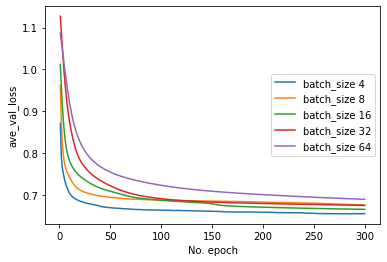

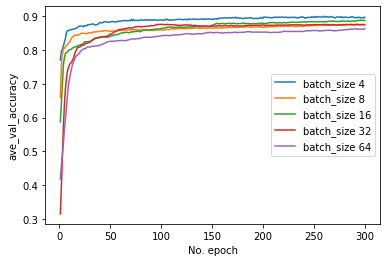

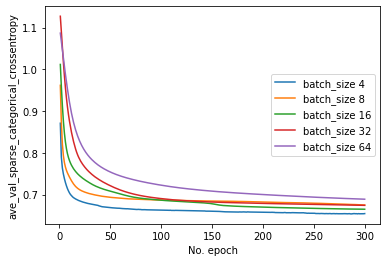

In [436]:
x = np.arange(1, 301)

for i in range(5):
    plt.plot(x, ave_val_loss[i], label='batch_size '+str(batch_sizes[i]))
    plt.ylabel("ave_val_loss")
    plt.xlabel("No. epoch")
    plt.legend(loc="center right")
plt.show()
    
for i in range(5):
    plt.plot(x, ave_val_accuracy[i], label='batch_size '+str(batch_sizes[i]))
    plt.ylabel("ave_val_accuracy")
    plt.xlabel("No. epoch")
    plt.legend(loc="center right")
plt.show()    

for i in range(5):
    plt.plot(x, ave_val_sparse_categorical_crossentropy[i], label='batch_size '+str(batch_sizes[i]))
    plt.ylabel("ave_val_sparse_categorical_crossentropy")
    plt.xlabel("No. epoch")
    plt.legend(loc="center right")    
plt.show()

### Eyeballing Batch Size <a name="eyeballing_batch_size"></a> 
[Back to top](#toc)

We can see from averaging the validation set values, that ```batch_size = 16, 32, 64``` is significantly worse than ```batch_size = 4, 8```. 

We can also see that ```batch_size = 8``` performs quite similarly to ```batch_size = 4```, but takes almost half the time of batch_size = 4

Let's take a slightly more mathematical approach and consider the incremental time gains gotten from the incremental gains in performance, using the best results of ```batch_size = 4``` as the baseline

In [418]:
df_incremental_time_gains = df_ave_times_batch_sizes
df_incremental_time_gains['ave_time'] -= df_incremental_time_gains['ave_time'][0]
df_incremental_time_gains['ave_time'] = np.abs(df_incremental_time_gains['ave_time'])
df_incremental_time_gains

,batch_sizes,ave_time
0,4,0.000000
1,8,0.102972
2,16,0.151918
3,32,0.176704
4,64,0.191414


In [419]:
incremental_ave_val_loss_gains = np.array(ave_val_loss).T.copy()
incremental_ave_val_accuracy_gains = np.array(ave_val_accuracy).T.copy()
incremental_ave_val_sparse_categorical_crossentropy_gains = np.array(ave_val_sparse_categorical_crossentropy).T.copy()

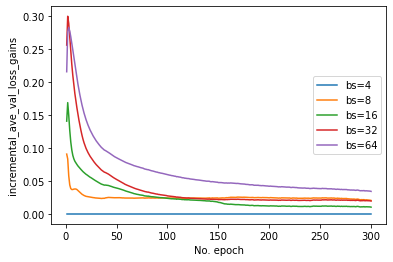

In [435]:
df_incremental_ave_val_loss_gains = pd.DataFrame(incremental_ave_val_loss_gains, columns =['bs=4', 'bs=8', 'bs=16', 'bs=32', 'bs=64']) 
df_incremental_ave_val_loss_gains_baseline = pd.DataFrame(df_incremental_ave_val_loss_gains['bs=4'], columns=['bs=4'])

for column in df_incremental_ave_val_loss_gains.columns:
    df_incremental_ave_val_loss_gains[column] = df_incremental_ave_val_loss_gains[column] - df_incremental_ave_val_loss_gains_baseline['bs=4']

for column in df_incremental_ave_val_loss_gains.columns:
    plt.plot(x, df_incremental_ave_val_loss_gains[column], label=column)
    plt.ylabel("incremental_ave_val_loss_gains")
    plt.xlabel("No. epoch")
    plt.legend(loc="center right")    
plt.show()


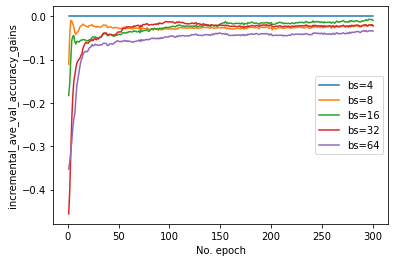

In [434]:
df_incremental_ave_val_accuracy_gains = pd.DataFrame(incremental_ave_val_accuracy_gains, columns =['bs=4', 'bs=8', 'bs=16', 'bs=32', 'bs=64']) 
df_incremental_ave_val_accuracy_gains_baseline = pd.DataFrame(df_incremental_ave_val_accuracy_gains['bs=4'], columns=['bs=4'])

for column in df_incremental_ave_val_accuracy_gains.columns:
    df_incremental_ave_val_accuracy_gains[column] = df_incremental_ave_val_accuracy_gains[column] - df_incremental_ave_val_accuracy_gains_baseline['bs=4']

for column in df_incremental_ave_val_accuracy_gains.columns:
    plt.plot(x, df_incremental_ave_val_accuracy_gains[column], label=column)
    plt.ylabel("incremental_ave_val_accuracy_gains")
    plt.xlabel("No. epoch")
    plt.legend(loc="center right")    
plt.show()


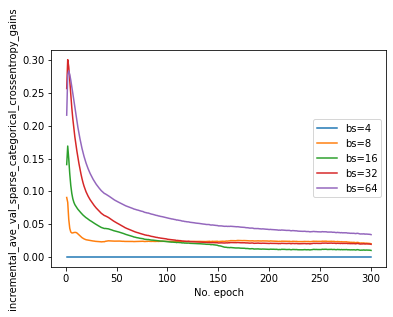

In [433]:
df_incremental_ave_val_sparse_categorical_crossentropy_gains = pd.DataFrame(incremental_ave_val_sparse_categorical_crossentropy_gains, columns =['bs=4', 'bs=8', 'bs=16', 'bs=32', 'bs=64']) 
df_incremental_ave_val_sparse_categorical_crossentropy_gains_baseline = pd.DataFrame(df_incremental_ave_val_sparse_categorical_crossentropy_gains['bs=4'], columns=['bs=4'])

for column in df_incremental_ave_val_sparse_categorical_crossentropy_gains.columns:
    df_incremental_ave_val_sparse_categorical_crossentropy_gains[column] = df_incremental_ave_val_sparse_categorical_crossentropy_gains[column] - df_incremental_ave_val_sparse_categorical_crossentropy_gains_baseline['bs=4']

for column in df_incremental_ave_val_sparse_categorical_crossentropy_gains.columns:
    plt.plot(x, df_incremental_ave_val_sparse_categorical_crossentropy_gains[column], label=column)
    plt.ylabel("incremental_ave_val_sparse_categorical_crossentropy_gains")
    plt.xlabel("No. epoch")
    plt.legend(loc="center right")    
plt.show()


# Conclusion <a name="conclusion"></a> 
[Back to top](#toc)

> ```batch_size=16``` (green line) appears to give the best value for incremental (lost) performance vs incremental time saved

It has the closest incremental performance to the best model which uses ```batch_size=4```, but has significant time savings per epoch, taking almost a quarter of the time 

> Select ```batch_size=16``` for future trainings

### Try Test Set <a name="try_test_set"></a> 
[Back to top](#toc)

We shall use ```batch_size=16``` to check the performance of the model on the test set

In [424]:
batch_size = 16
test_histories = {}
test_times = {}

model = create_model(num_neurons, num_classes, regularization, optimizer, loss, metrics)

time_callback = TimeHistory()
callbacks = [TqdmCallback(verbose=1), time_callback]

model_name = "test_set"

print("Training ", model_name)

test_histories[model_name] = model.fit(X_test, Y_test,
                                        epochs=epochs,
                                        verbose = 0,
                                        batch_size=batch_size,
                                        callbacks=callbacks)

test_times[model_name] = time_callback.times

Model created


Training  test_set



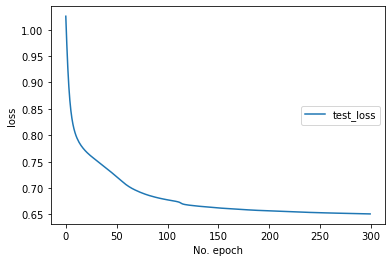

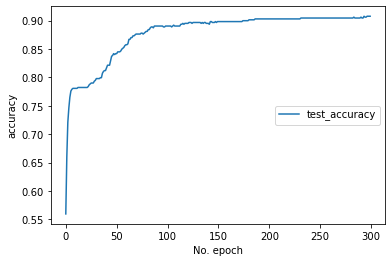

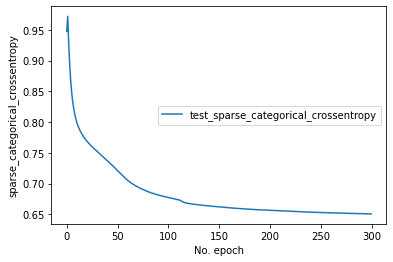

In [432]:
for history_object in ['loss', 'accuracy', 'sparse_categorical_crossentropy']:
    plt.plot(test_histories[model_name].history[history_object], label='test_'+history_object)
    plt.ylabel(history_object)
    plt.xlabel('No. epoch')
    plt.legend(loc="center right")
    plt.show()